# Fashion MNIST Classification with Artificial Neural Networks (ANNs) and Visualizations

##### Student Name : Kuncheria Tom

##### Student Id :C0900973

 ## Load and Explore the  Dataset

In [2]:

from tensorflow.keras.datasets import fashion_mnist

# Load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
import numpy as np
# Display dataset structure

print(f'Train images shape: {train_images.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Number of classes: {len(np.unique(train_labels))}')

Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)
Number of classes: 10


## Data Preprocessing

In [4]:
# Scale pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape data to fit the ANN input requirements
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


In [6]:
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


## Visualizations

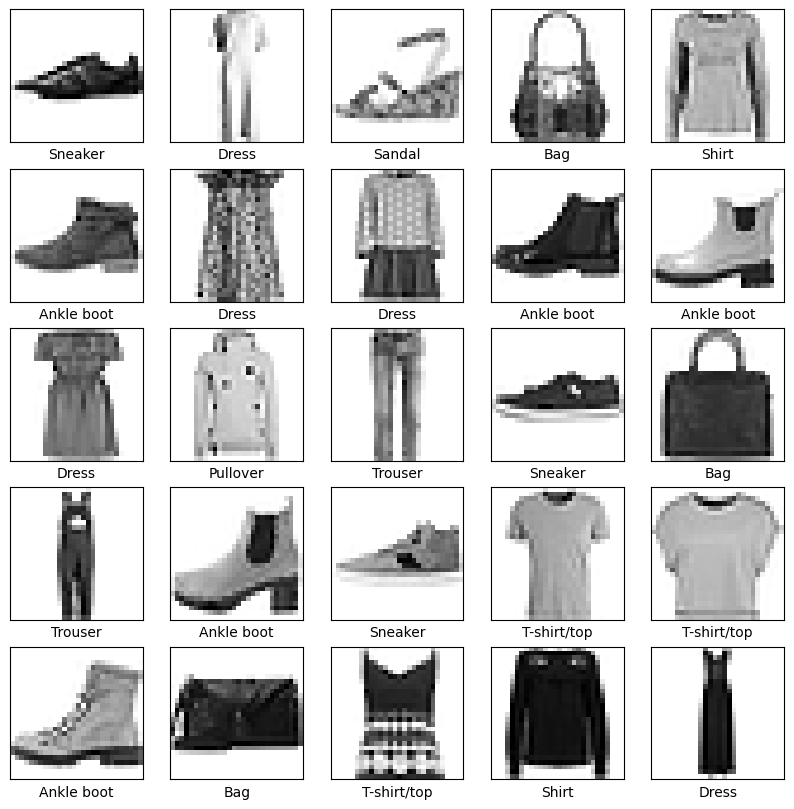

In [7]:
import matplotlib.pyplot as plt
# Display sample images

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



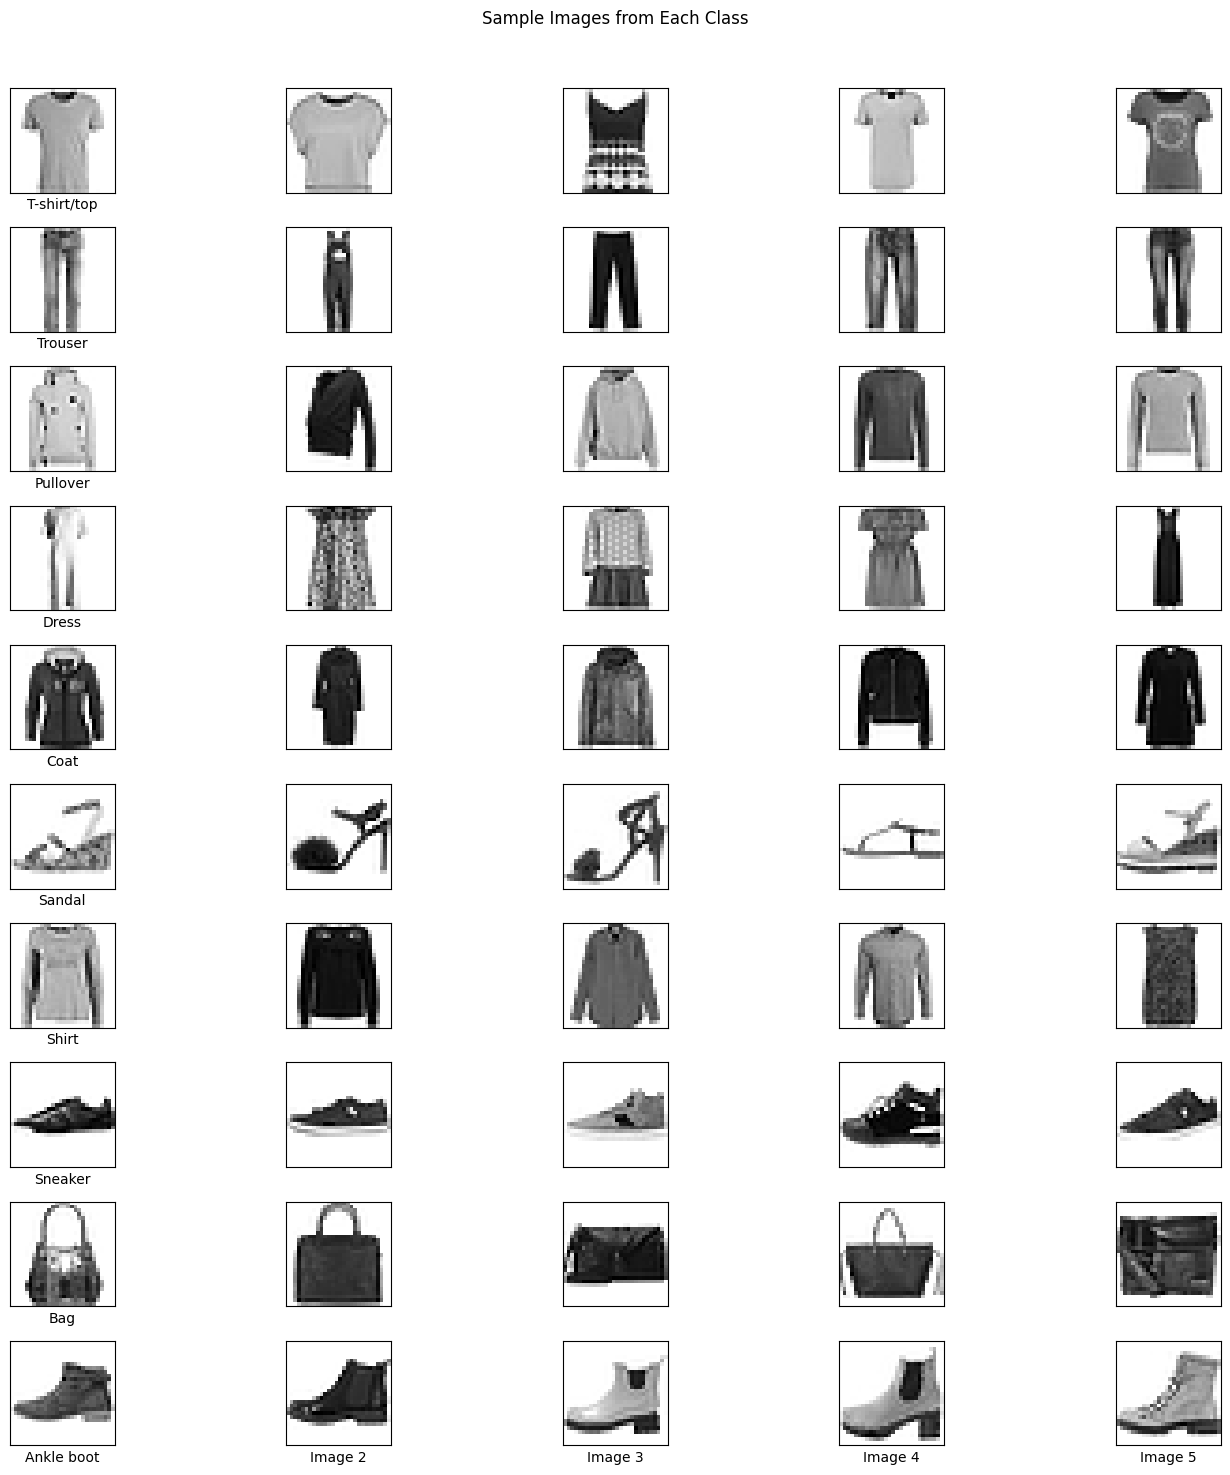

In [10]:
import matplotlib.pyplot as plt

# Create a figure with enough space for all the labels
plt.figure(figsize=(15, 15))
for class_index in range(10):
    # Plot one sample image from each class in the first column
    plt.subplot(10, 5, class_index * 5 + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[train_labels == class_index][0], cmap=plt.cm.binary)
    plt.xlabel(class_names[class_index])
    
    # Plot additional images for each class in the remaining columns
    for image_index in range(1, 5):
        plt.subplot(10, 5, class_index * 5 + image_index + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[train_labels == class_index][image_index], cmap=plt.cm.binary)
        if class_index == 9:  # Add x-axis labels only for the last row of images
            plt.xlabel(f'Image {image_index + 1}')
plt.suptitle('Sample Images from Each Class')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Add space for the suptitle
plt.show()


C:\Users\kunch\AppData\Local\Temp\ipykernel_10080\4273889782.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_labels, palette='viridis')


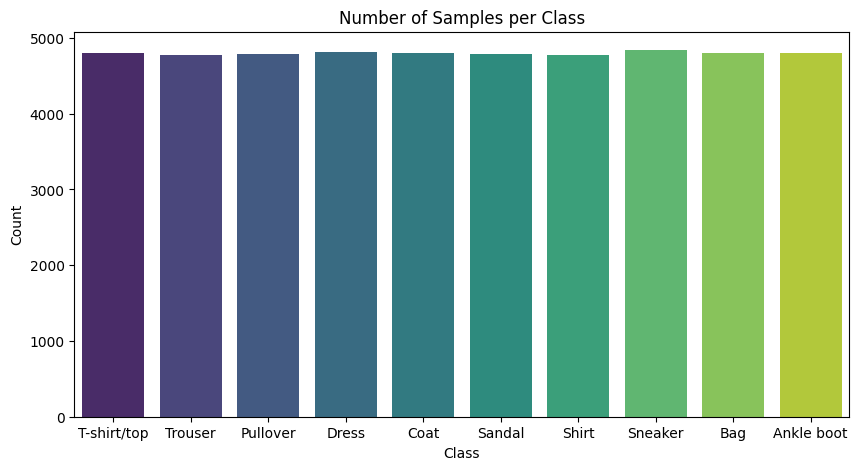

In [13]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x=train_labels, palette='viridis')
plt.xticks(range(10), class_names)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Samples per Class')
plt.show()


##  Build an Artificial Neural Network

## Model 1: Simple ANN

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model_1 = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history_1 = model_1.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))


C:\Users\kunch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7751 - loss: 0.6401 - val_accuracy: 0.8487 - val_loss: 0.4128
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8584 - loss: 0.3882 - val_accuracy: 0.8575 - val_loss: 0.3857
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8745 - loss: 0.3409 - val_accuracy: 0.8668 - val_loss: 0.3706
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8849 - loss: 0.3151 - val_accuracy: 0.8824 - val_loss: 0.3239
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8888 - loss: 0.2940 - val_accuracy: 0.8814 - val_loss: 0.3316
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8944 - loss: 0.2817 - val_accuracy: 0.8792 - val_loss: 0.3407
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8991 - loss: 0.2681 - val_accuracy: 0.8792 - val_loss: 0.3400
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9050 - loss: 0.2532 - 

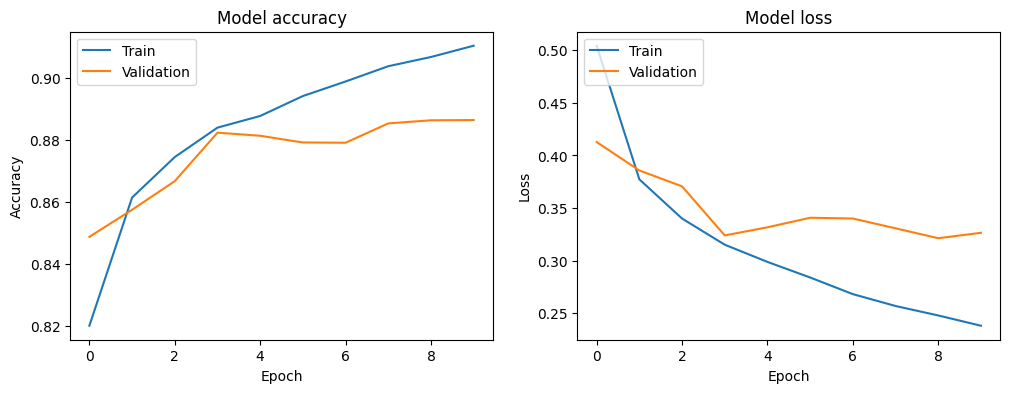

In [29]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Model 2: Deeper ANN

In [27]:
model_2 = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history_2 = model_2.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7733 - loss: 0.6390 - val_accuracy: 0.8367 - val_loss: 0.4455
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8554 - loss: 0.3888 - val_accuracy: 0.8609 - val_loss: 0.4048
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8736 - loss: 0.3404 - val_accuracy: 0.8724 - val_loss: 0.3539
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8838 - loss: 0.3119 - val_accuracy: 0.8767 - val_loss: 0.3359
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8928 - loss: 0.2885 - val_accuracy: 0.8723 - val_loss: 0.3494
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8945 - loss: 0.2803 - val_accuracy: 0.8823 - val_loss: 0.3238
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9000 - loss: 0.2639 - val_accuracy: 0.8815 - val_loss: 0.3362
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9041 - loss: 0.2512 - 

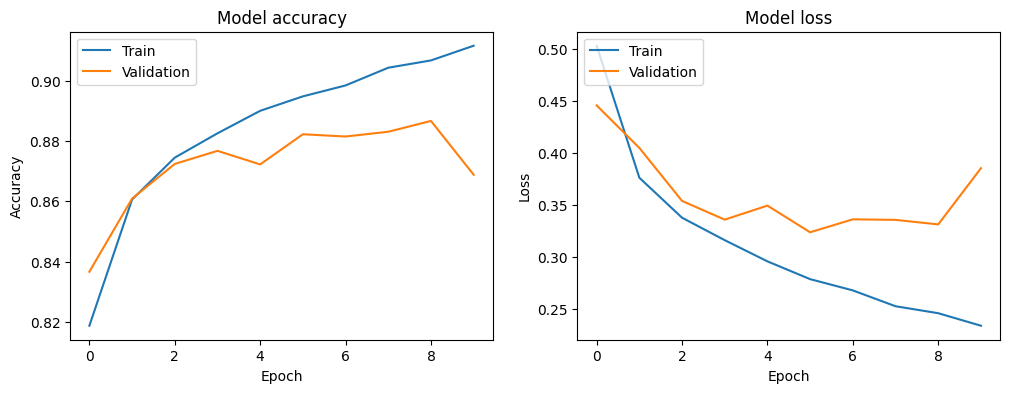

In [30]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Model 3: ANN with Dropout

In [28]:
from tensorflow.keras.layers import Dropout

model_3 = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(256, activation='relu'),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history_3 = model_3.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7502 - loss: 0.6997 - val_accuracy: 0.8461 - val_loss: 0.4274
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8473 - loss: 0.4120 - val_accuracy: 0.8674 - val_loss: 0.3631
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8658 - loss: 0.3626 - val_accuracy: 0.8658 - val_loss: 0.3634
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8734 - loss: 0.3416 - val_accuracy: 0.8756 - val_loss: 0.3470
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8783 - loss: 0.3279 - val_accuracy: 0.8777 - val_loss: 0.3482
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8877 - loss: 0.3024 - val_accuracy: 0.8745 - val_loss: 0.3488
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8878 - loss: 0.2994 - val_accuracy: 0.8871 - val_loss: 0.3172
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8941 - loss: 0.2812 - 

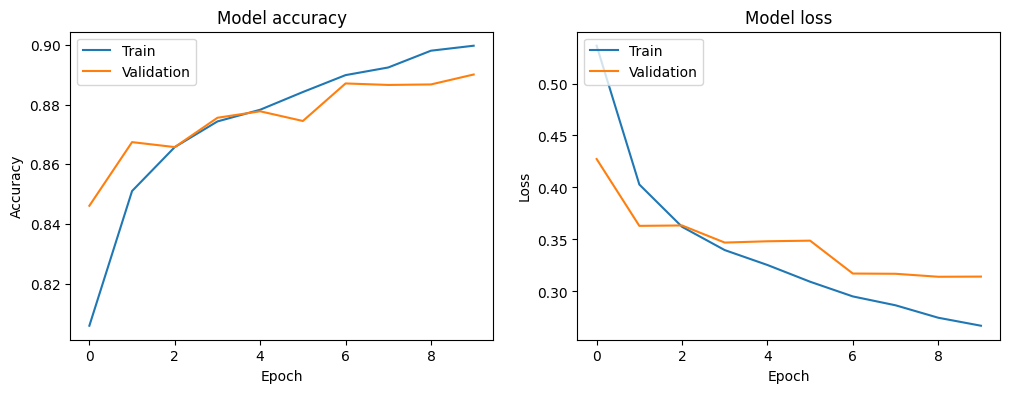

In [31]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Model 4: ANN with hyper parameter tuning and cross validation

In [18]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

# Define a class to wrap the Keras model for use with GridSearchCV
class KerasModelWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, optimizer='adam', init='he_uniform', batch_size=32, epochs=10):
        self.optimizer = optimizer
        self.init = init
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None

    def create_model(self):
        model = Sequential()
        model.add(Dense(32, input_shape=(28 * 28,), activation='relu', kernel_initializer=self.init))
        model.add(Dense(100, activation='relu', kernel_initializer=self.init))
        model.add(Dense(10, activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer=self.optimizer, metrics=['accuracy'])
        return model

    def fit(self, X, y, X_val=None, y_val=None):
        self.model = self.create_model()
        self.model.fit(X, y, batch_size=self.batch_size, epochs=self.epochs, verbose=0, validation_data=(X_val, y_val))
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=-1)

    def score(self, X, y):
        _, accuracy = self.model.evaluate(X, y, verbose=0)
        return accuracy

# Define the hyperparameters grid to search
param_grid = {
    'batch_size': [10, 20],
    'epochs': [5, 10],
    'optimizer': ['SGD', 'adam'],
    'init': ['he_uniform', 'glorot_uniform']
}


# Flatten the images
train_images_flat = train_images.reshape(-1, 28 * 28)
val_images_flat = val_images.reshape(-1, 28 * 28)
test_images_flat = test_images.reshape(-1, 28 * 28)

# Create the Keras model wrapper
model = KerasModelWrapper()

# Perform grid search with cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)
grid_result = grid.fit(train_images_flat, train_labels, X_val=val_images_flat, y_val=val_labels)

# Print the best parameters and score
print(f'Best score: {grid_result.best_score_} with parameters: {grid_result.best_params_}')

# Train the best model on the full training set
best_params = grid_result.best_params_
best_model = KerasModelWrapper(optimizer=best_params['optimizer'], init=best_params['init'],
                               batch_size=best_params['batch_size'], epochs=best_params['epochs'])
history=best_model.fit(train_images_flat, train_labels, X_val=val_images_flat, y_val=val_labels)

# Evaluate the model using the test set
test_loss, test_acc = best_model.model.evaluate(test_images_flat, test_labels)
print(f'Test accuracy: {test_acc}')


Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\kunch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best score: 0.8757291634877523 with parameters: {'batch_size': 10, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'adam'}
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.8611 - loss: 0.3848
Test accuracy: 0.8593000173568726


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step


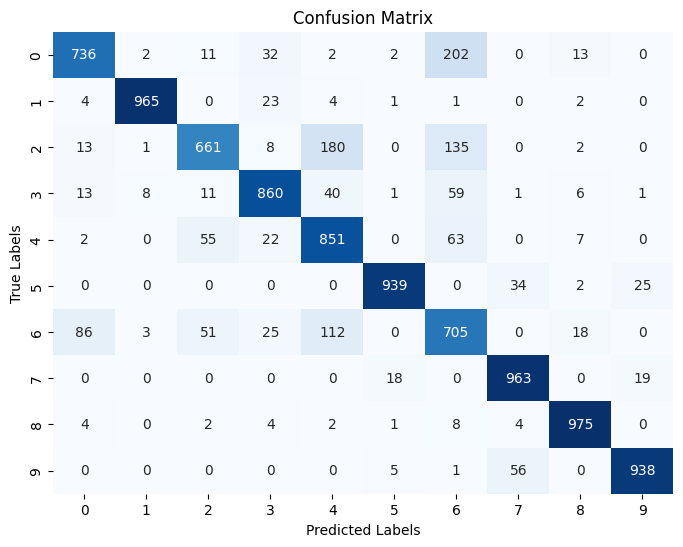

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


predictions = best_model.predict(test_images_flat)

# Confusion Matrix
cm = confusion_matrix(test_labels, predictions)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()




## Evaluate and Compare Models

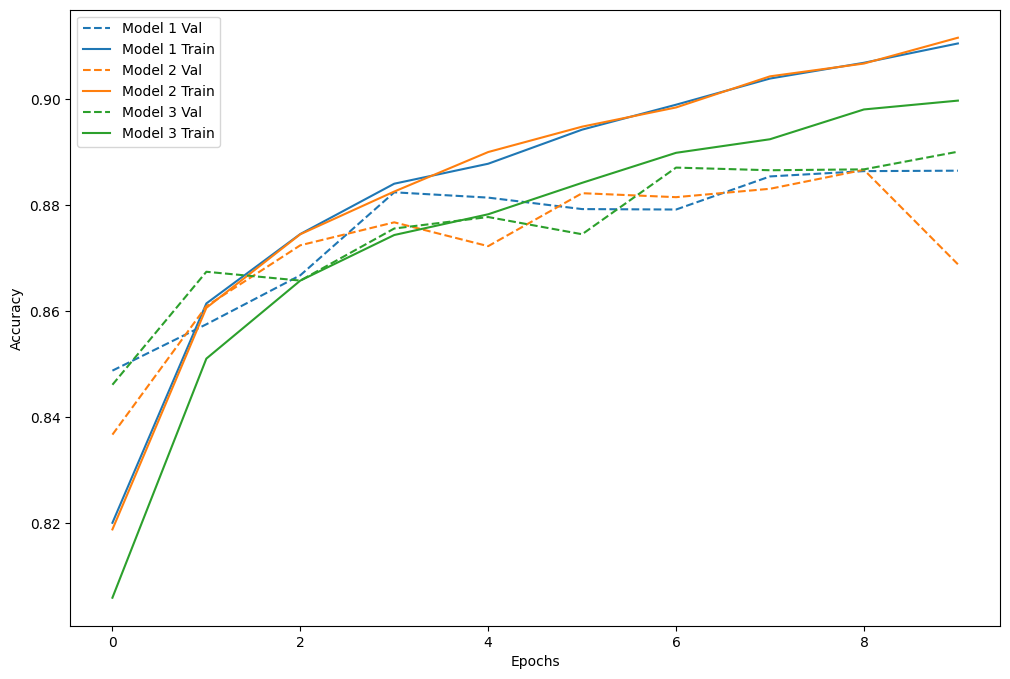

In [34]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(12, 8))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_' + key], '--', label=name.title() + ' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title() + ' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

plot_history([('Model 1', history_1), ('Model 2', history_2), ('Model 3', history_3)])


## Test Set Prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


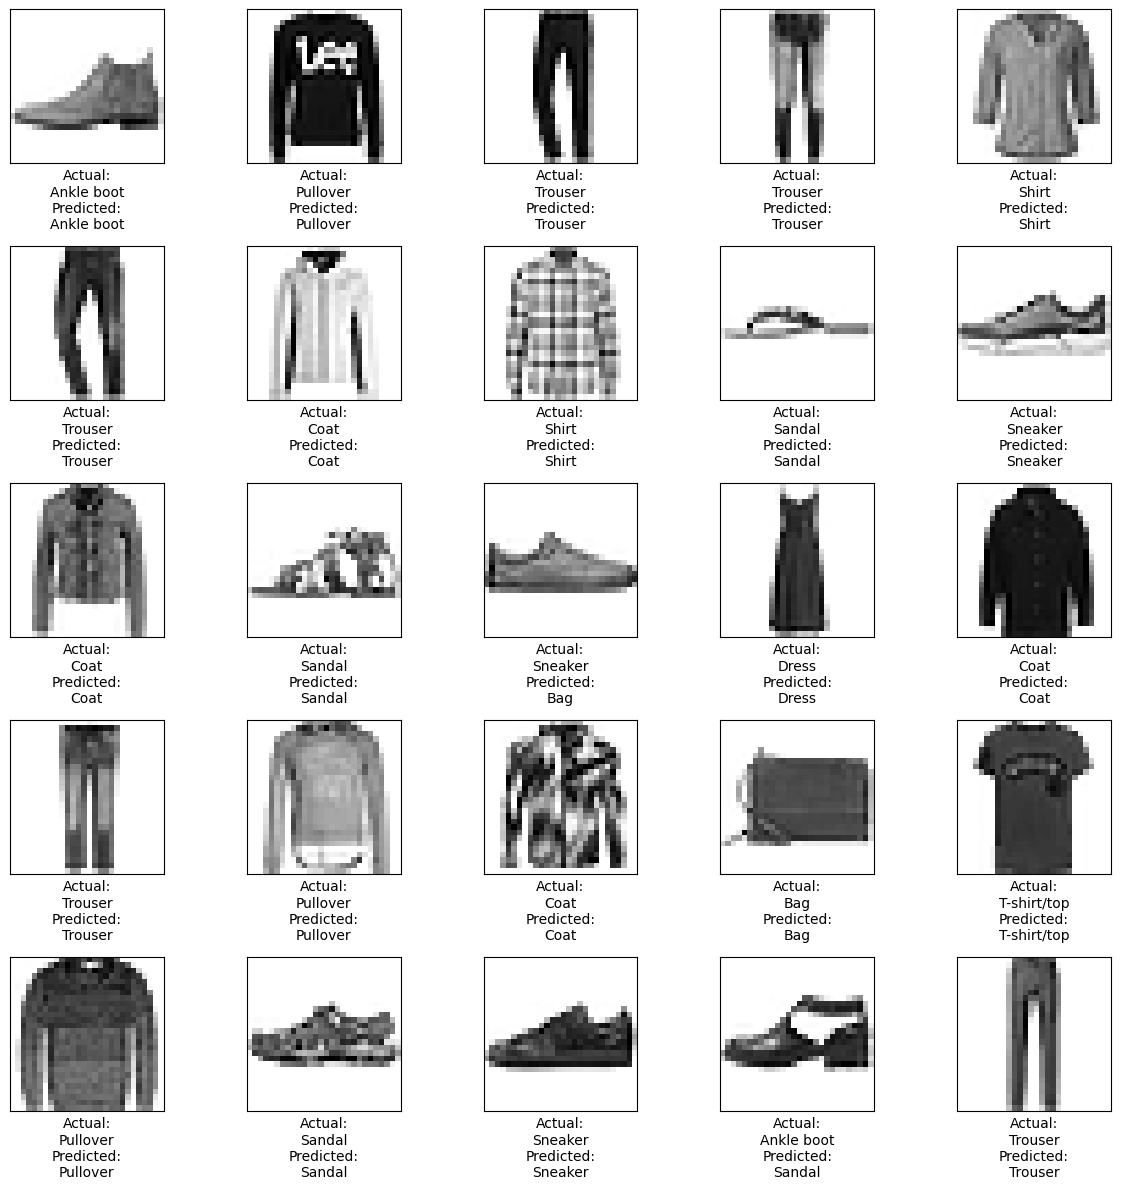

In [85]:
predictions = best_model.predict(test_images)

# Display sample predictions
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    actual_class = class_names[test_labels[i]]
    predicted_class = class_names[np.argmax(predictions[i])]
    plt.xlabel(f"Actual:\n{actual_class}\nPredicted:\n{predicted_class}", fontsize=10)
plt.tight_layout()
plt.show()
